In [0]:
from google.colab import drive,files

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Imports go here
import pickle
import numpy as np
from keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
# dir path
datadirpath = 'gdrive/My Drive/DL Project/Data/ready_chinese_food'
labeldirpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngreLabel.txt'
IngredientList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientList.txt'
IngredientTypeSheet = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientType.xlsx'

trainlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TR.txt'
vallistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/VAL.txt'
testlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TE.txt'

pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

pickletraindata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y3.pkl'
picklevaldata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y3.pkl'
pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'

credentialFile = 'gdrive/My Drive/DL Project/Credentials/Food-Ingredient-cred.json'
#pickleModelC_IngFood.pkl
#Models Pickled
pickleModelA1_IngFood = 'gdrive/My Drive/DL Project/PickleFiles/pickleModelA1_IngFood.pkl'

pickletraindata_X_new= 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_balancedfull.pkl'

pickletraindata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y1full.pkl'

pickletraindata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y2full.pkl'

pickletraindata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y3full.pkl'



In [5]:
train_X = pickle.load(open(pickletraindata_X_new, 'rb' ))
train_X = np.array(train_X)
print(train_X.shape)

(80000, 1, 7, 7, 512)


In [6]:
train_X=train_X.reshape(train_X.shape[0],7,7,512)
print(train_X.shape)

(80000, 7, 7, 512)


In [7]:
train_Y1 = pickle.load(open(pickletraindata_Y1_new, 'rb' ))
train_Y1 = np.array(train_Y1)
print(train_Y1.shape)

(80000, 172)


In [8]:
train_Y2_list = pickle.load(open(pickletraindata_Y2_new, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(80000, 353)


In [9]:
val_X = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X)
print(val_X.shape)

(11016, 1, 7, 7, 512)


In [10]:
val_X=val_X.reshape(val_X.shape[0],7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


In [11]:
val_Y1 = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1)
print(val_Y1.shape)

(11016, 172)


In [12]:
val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0
  
print(val_Y2.shape)

(11016, 353)


In [13]:
# Loading test_X

test_X = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X)

print(test_X.shape)
test_X=test_X.reshape(test_X.shape[0],7,7,512)
print(test_X.shape)

# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

test_Y3 = pickle.load(open(pickletestdata_Y3,"rb"))
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 1, 7, 7, 512)
(33154, 7, 7, 512)
(33154, 172)
(33154, 353)


In [0]:
train_Y3 = np.array(pickle.load(open(pickletraindata_Y3_new,"rb")))
val_Y3 = pickle.load(open(picklevaldata_Y3,"rb"))


In [0]:
def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 2048)        9439232   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 1024)        18875392  
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 1024)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 1024)        9438208   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 1024)        0   

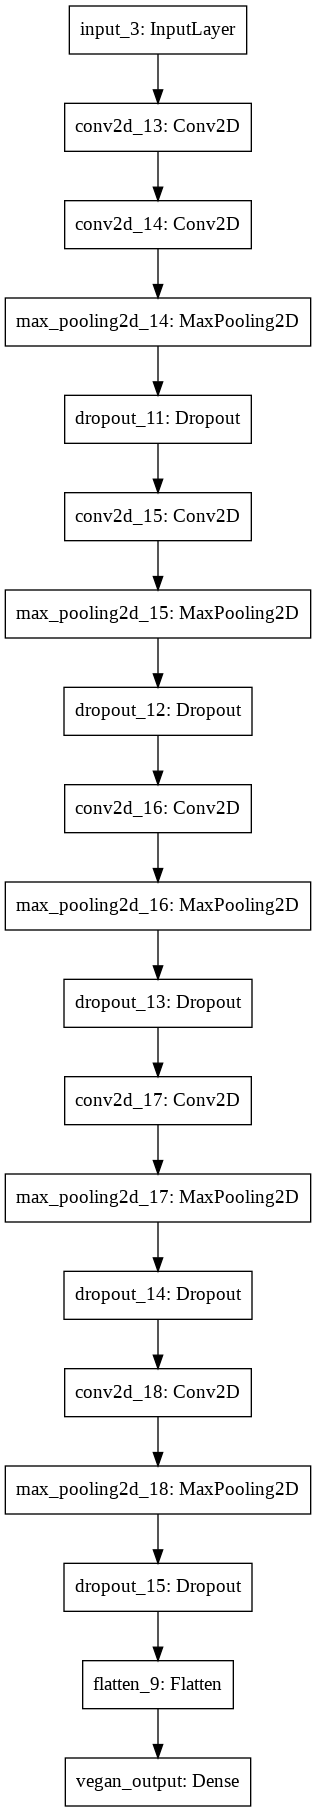

In [32]:

inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

conv2D4 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.5)(maxPool2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.3)(maxPool2D6)

flattened4 = Flatten()(dropout4)

flattened6 = Flatten()(dropout6)

output3 = Dense(1,activation='sigmoid',name='vegan_output')(flattened6)  ##  Vegan recognition


model_vegan = Model(inputs=inputs, outputs=[output3]) # Defining model with Architecture A1
print(model_vegan.summary()) # summarize layers
plot_model(model_vegan, to_file='Single task Vegan.png') # plot graph



In [33]:
model_vegan.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 2048)        9439232   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 1024)        18875392  
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 1024)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 1024)        9438208   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 1024)        0   

In [34]:
model_vegan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=[get_f1,'accuracy'])
history = model_vegan.fit(train_X, train_Y3, epochs=50, batch_size=256,validation_data=(val_X,val_Y3))

Train on 80000 samples, validate on 11016 samples
Epoch 1/50
80000/80000 [==============================] - 57s 719us/step - loss: 0.2536 - get_f1: 0.8619 - acc: 0.8761 - val_loss: 0.4449 - val_get_f1: 0.8640 - val_acc: 0.8043
Epoch 2/50
80000/80000 [==============================] - 54s 679us/step - loss: 0.0934 - get_f1: 0.9619 - acc: 0.9659 - val_loss: 0.5159 - val_get_f1: 0.8755 - val_acc: 0.8197
Epoch 3/50
80000/80000 [==============================] - 54s 679us/step - loss: 0.0560 - get_f1: 0.9780 - acc: 0.9804 - val_loss: 0.4925 - val_get_f1: 0.8772 - val_acc: 0.8264
Epoch 4/50
80000/80000 [==============================] - 54s 679us/step - loss: 0.0331 - get_f1: 0.9868 - acc: 0.9883 - val_loss: 0.6249 - val_get_f1: 0.8782 - val_acc: 0.8268
Epoch 5/50
80000/80000 [==============================] - 54s 679us/step - loss: 0.0207 - get_f1: 0.9921 - acc: 0.9929 - val_loss: 0.8718 - val_get_f1: 0.8794 - val_acc: 0.8272
Epoch 6/50
80000/80000 [==============================] - 54s 680

In [35]:
## prediction on test


results = model_vegan.evaluate(test_X, [test_Y3], batch_size=128)
print(results)
#print('Ingredient F1:', results[4])
#print('Food Top5:', results[7])
#print('Vegan F1:', results[8])

print('Generate predictions for all samples')
predictions = model_vegan.predict(test_X)


#predictions_ingredients=1*(predictions[0] >= 0.5)
predictions_vegan=1*(predictions >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 9s 262us/step
[2.0750656814529744, 0.8325022435370951, 0.8250889787054353]
Generate predictions for all samples


In [37]:
print(classification_report(test_Y3, predictions_vegan))

              precision    recall  f1-score   support

           0       0.73      0.21      0.32      6666
           1       0.83      0.98      0.90     26488

    accuracy                           0.83     33154
   macro avg       0.78      0.59      0.61     33154
weighted avg       0.81      0.83      0.78     33154



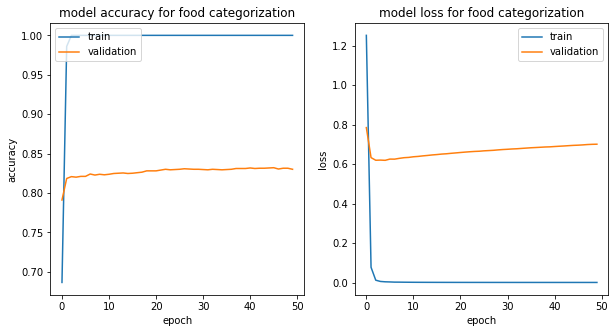

In [0]:
# Plotting the train,validation accuracy and loss statistics for food category classification.

fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy for food categorization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for food categorization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()